In [92]:
from collections import Counter

from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from pprint import pprint
from time import time

plt.rcParams['figure.figsize'] = [15, 15]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

# Data loading
news_train = fetch_20newsgroups(
    subset='train',
)
news_test = fetch_20newsgroups(
    subset='test',
)

In [93]:
def get_top_features(vect, clf, n=10, k=0):
    """
    Lists top 'n' discriminant words in class.
    
    :param vect: Instance of a vectoriser used in feature extraction, e.g.
        CountVectorizer, TfidfVectorizer, etc.
    :param clf: Instance of a linear classifier used, e.g. MultinomialNB.
    :param n: How many top features are to be printed.
    :param k: Class index.

    :return: A list of n most discriminant words in class.
    """
    feature_names = vect.get_feature_names()
    top_n = np.argsort(clf.coef_[k])[-n:][::-1]
    top_features = [feature_names[i] for i in top_n]

    return top_features

def compute_metrics(actual_y, pred_y):
    """
    Returns macro metrics: precision, accuracy and F1-score.
    """
    prec = metrics.precision_score(actual_y, pred_y, average='macro')
    acc = metrics.accuracy_score(actual_y, pred_y)
    f1 = metrics.f1_score(actual_y, pred_y, average='macro')
    
    return prec, acc, f1

Explore the data first.

In [94]:
print(f"Label: {news_train.target_names[news_train.target[3]]}\n\n")
print(news_train.data[3])

Label: comp.graphics


From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters



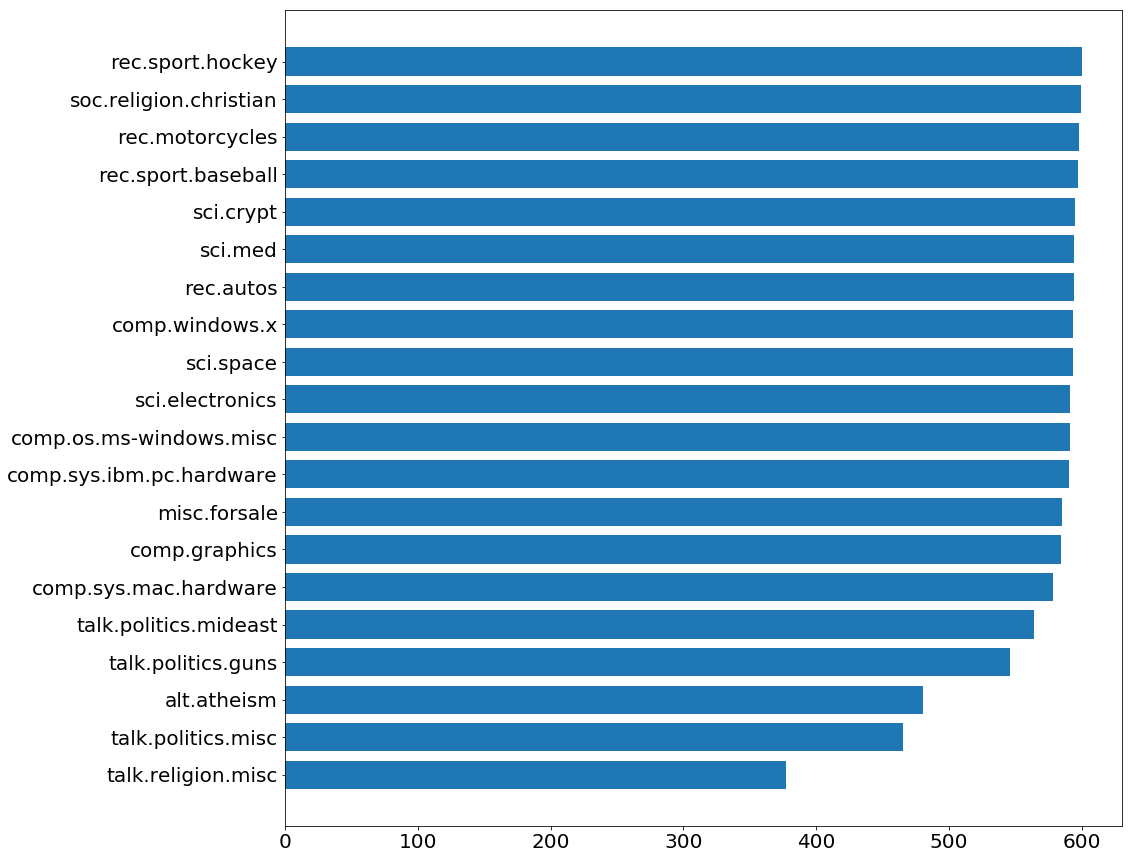

In [95]:
train_counts = {key: val for key, val in Counter(news_train.target).items()}
train_counts = {key: train_counts[key] for key in sorted(train_counts, key=train_counts.get)}
labels = [news_train.target_names[key] for key in train_counts.keys()]

gig, ax =plt.subplots()
ax.barh(range(len(train_counts)), list(train_counts.values()), 0.75, align='center')
ax.set_yticks(np.arange(len(train_counts)))
ax.set_yticklabels(labels)
plt.show()

## Model 1 - CountVectorizer

In [96]:
# Define the Vectorizer
vect = CountVectorizer()

train_x = vect.fit_transform(news_train.data)
train_y = news_train.target

test_x = vect.transform(news_test.data)
test_y = news_test.target

print("CountVectorizer")
print("="*80)
print("Summary:")
print(f"Training set: {len(news_train.target)}")
print(f" Testing set: {len(news_test.target)}")
print(f"Extracted {len(vect.get_feature_names())} features.")

# Define a classifier
nb = MultinomialNB(alpha=0.1)

# Fit the classifier
nb.fit(train_x, train_y)

# Make predictions on the test set
pred_y = nb.predict(test_x)

# Summary of the macro scores
print("="*80)
print("Scores:")
prec_1, acc_1, f1_1 = compute_metrics(test_y, pred_y)
print(f"Precision: {prec_1:.3f}")
print(f" Accuracy: {acc_1:.3f}")
print(f" F1-Score: {f1_1:.3f}")

CountVectorizer
Summary:
Training set: 11314
 Testing set: 7532
Extracted 130107 features.
Scores:
Precision: 0.798
 Accuracy: 0.806
 F1-Score: 0.785


## Model 2 - TfidfVectorizer

In [97]:
# Define the Vectorizer
vect = TfidfVectorizer()

train_x = vect.fit_transform(news_train.data)
train_y = news_train.target

test_x = vect.transform(news_test.data)
test_y = news_test.target

print("CountVectorizer")
print("="*80)
print("Summary:")
print(f"Training set: {len(news_train.target)}")
print(f" Testing set: {len(news_test.target)}")
print(f"Extracted {len(vect.get_feature_names())} features.")

# Define a classifier
nb = MultinomialNB(alpha=0.1)

# Fit the classifier
nb.fit(train_x, train_y)

# Make predictions on the test set
pred_y = nb.predict(test_x)

# Summary of the macro scores
print("="*80)
print("Scores:")
prec_2, acc_2, f1_2 = compute_metrics(test_y, pred_y)
print(f"Precision: {prec_2:.3f} ({prec_1:.3f})")
print(f" Accuracy: {acc_2:.3f} ({acc_1:.3f})")
print(f" F1-Score: {f1_2:.3f} ({f1_1:.3f})")

CountVectorizer
Summary:
Training set: 11314
 Testing set: 7532
Extracted 130107 features.
Scores:
Precision: 0.839 (0.798)
 Accuracy: 0.826 (0.806)
 F1-Score: 0.814 (0.785)


In [98]:
print("Top words per class")
for k, cat in enumerate(news_train.target_names):
    print(f"{cat:<25}", get_top_features(vect, nb, n=10, k=k))

Top words per class
alt.atheism               ['the', 'of', 'to', 'is', 'that', 'in', 'you', 'and', 'it', 'keith']
comp.graphics             ['the', 'to', 'of', 'graphics', 'and', 'is', 'it', 'for', 'in', 'edu']
comp.os.ms-windows.misc   ['windows', 'the', 'to', 'it', 'is', 'edu', 'and', 'of', 'for', 'file']
comp.sys.ibm.pc.hardware  ['the', 'to', 'scsi', 'and', 'drive', 'it', 'of', 'is', 'ide', 'card']
comp.sys.mac.hardware     ['the', 'to', 'mac', 'apple', 'edu', 'of', 'and', 'is', 'it', 'in']
comp.windows.x            ['the', 'to', 'window', 'of', 'is', 'and', 'motif', 'in', 'mit', 'it']
misc.forsale              ['sale', 'for', 'the', 'edu', 'and', 'to', '00', 'of', 'offer', 'shipping']
rec.autos                 ['the', 'car', 'to', 'and', 'of', 'in', 'it', 'you', 'is', 'that']
rec.motorcycles           ['the', 'to', 'bike', 'and', 'of', 'in', 'com', 'it', 'you', 'dod']
rec.sport.baseball        ['the', 'edu', 'he', 'to', 'in', 'of', 'and', 'baseball', 'is', 'that']
rec.sport.hocke

## Model 3 - TfidfVectorizer + stopwords

In [99]:
print(stopwords.words('english')[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [100]:
# Define the Vectorizer
vect = TfidfVectorizer(
    stop_words=stopwords.words('english')
)

train_x = vect.fit_transform(news_train.data)
train_y = news_train.target

test_x = vect.transform(news_test.data)
test_y = news_test.target

print("CountVectorizer")
print("="*80)
print("Summary:")
print(f"Training set: {len(news_train.target)}")
print(f" Testing set: {len(news_test.target)}")
print(f"Extracted {len(vect.get_feature_names())} features.")

# Define a classifier
nb = MultinomialNB(alpha=0.1)

# Fit the classifier
nb.fit(train_x, train_y)

# Make predictions on the test set
pred_y = nb.predict(test_x)

# Summary of the macro scores
print("="*80)
print("Scores:")
prec_3, acc_3, f1_3 = compute_metrics(test_y, pred_y)
print(f"Precision: {prec_3:.3f} ({prec_2:.3f})")
print(f" Accuracy: {acc_3:.3f} ({acc_2:.3f})")
print(f" F1-Score: {f1_3:.3f} ({f1_2:.3f})")

CountVectorizer
Summary:
Training set: 11314
 Testing set: 7532
Extracted 129963 features.
Scores:
Precision: 0.842 (0.839)
 Accuracy: 0.834 (0.826)
 F1-Score: 0.823 (0.814)


In [102]:
print("Top words per class")
for k, cat in enumerate(news_train.target_names):
    print(f"{cat:<25}", get_top_features(vect, nb, n=10, k=k))

Top words per class
alt.atheism               ['keith', 'edu', 'god', 'caltech', 'atheists', 'livesey', 'com', 'atheism', 'sgi', 'people']
comp.graphics             ['graphics', 'edu', 'image', '3d', 'files', 'lines', 'university', 'com', 'subject', 'polygon']
comp.os.ms-windows.misc   ['windows', 'edu', 'file', 'dos', 'files', 'driver', 'drivers', 'ms', 'ax', 'com']
comp.sys.ibm.pc.hardware  ['scsi', 'drive', 'ide', 'card', 'edu', 'bus', 'controller', 'com', 'pc', 'disk']
comp.sys.mac.hardware     ['mac', 'apple', 'edu', 'drive', 'quadra', 'se', 'centris', 'monitor', 'simms', 'scsi']
comp.windows.x            ['window', 'motif', 'mit', 'server', 'com', 'edu', 'widget', 'xterm', 'x11r5', 'application']
misc.forsale              ['sale', 'edu', '00', 'offer', 'shipping', 'new', 'university', 'distribution', 'condition', 'lines']
rec.autos                 ['car', 'com', 'cars', 'edu', 'engine', 'article', 'would', 'writes', 'oil', 'subject']
rec.motorcycles           ['bike', 'com', 'dod

There's still a lot of noise: .edu, .com are of course parts of domains. Keith, Leveish are names. The model is actualy overfitting to posters' email addresses!

So -- back to the drawing board...

## Model 4 - TfidfVectorizer + stopwords + cleaner data

In [103]:
print(f"Label: {news_train.target_names[news_train.target[3]]}\n\n")
print(news_train.data[3])

Label: comp.graphics


From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters



Fortunately, the cleaning has already been done for us...

In [104]:
# Data loading
news_train = fetch_20newsgroups(
    subset='train',
    remove=('headers', 'footers', 'quotes'),
)
news_test = fetch_20newsgroups(
    subset='test',
    remove=('headers', 'footers', 'quotes'),
)

In [105]:
print(f"Label: {news_train.target_names[news_train.target[3]]}\n\n")
print(news_train.data[3])

Label: comp.graphics



Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.



In [106]:
# Define the Vectorizer
vect = TfidfVectorizer(
    stop_words=stopwords.words('english')
)

train_x = vect.fit_transform(news_train.data)
train_y = news_train.target

test_x = vect.transform(news_test.data)
test_y = news_test.target

print("CountVectorizer")
print("="*80)
print("Summary:")
print(f"Training set: {len(news_train.target)}")
print(f" Testing set: {len(news_test.target)}")
print(f"Extracted {len(vect.get_feature_names())} features.")

# Define a classifier
nb = MultinomialNB(alpha=0.1)

# Fit the classifier
nb.fit(train_x, train_y)

# Make predictions on the test set
pred_y = nb.predict(test_x)

# Summary of the macro scores
print("="*80)
print("Scores:")
prec_4, acc_4, f1_4 = compute_metrics(test_y, pred_y)
print(f"Precision: {prec_4:.3f} ({prec_3:.3f})")
print(f" Accuracy: {acc_4:.3f} ({acc_3:.3f})")
print(f" F1-Score: {f1_4:.3f} ({f1_3:.3f})")

CountVectorizer
Summary:
Training set: 11314
 Testing set: 7532
Extracted 101487 features.
Scores:
Precision: 0.714 (0.842)
 Accuracy: 0.697 (0.834)
 F1-Score: 0.670 (0.823)


In [107]:
print("Top words per class")
for k, cat in enumerate(news_train.target_names):
    print(f"{cat:<25}", get_top_features(vect, nb, n=10, k=k))

Top words per class
alt.atheism               ['god', 'people', 'one', 'think', 'atheism', 'would', 'religion', 'say', 'atheists', 'islam']
comp.graphics             ['graphics', 'image', 'thanks', 'files', 'file', 'program', 'would', 'anyone', 'know', '3d']
comp.os.ms-windows.misc   ['windows', 'file', 'dos', 'files', 'drivers', 'driver', 'use', 'thanks', 'problem', 'card']
comp.sys.ibm.pc.hardware  ['drive', 'scsi', 'card', 'bus', 'controller', 'ide', 'pc', 'thanks', 'disk', 'system']
comp.sys.mac.hardware     ['mac', 'apple', 'drive', 'problem', 'thanks', 'one', 'simms', 'get', 'would', 'quadra']
comp.windows.x            ['window', 'motif', 'server', 'widget', 'thanks', 'application', 'use', 'x11r5', 'windows', 'using']
misc.forsale              ['sale', '00', 'offer', 'shipping', 'condition', 'new', 'please', 'price', 'sell', 'email']
rec.autos                 ['car', 'cars', 'like', 'would', 'engine', 'get', 'dealer', 'good', 'new', 'ford']
rec.motorcycles           ['bike', 'dod

## Model 5 -- TBA -- State of the art -- word embeddings?

In [204]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


num_words = 10000
maxlen = 10

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(news_train.data)
train_x_new = tokenizer.texts_to_sequences(news_train.data)
test_x_new = tokenizer.texts_to_sequences(news_test.data)


train_x_new = pad_sequences(train_x_new, padding='post', maxlen=maxlen)
test_x_new = pad_sequences(test_x_new, padding='post', maxlen=maxlen)

In [205]:
print(news_train.data[3])
print(train_x_new[3])


Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

[189 323  72   3  81  55 169  49  14 354]


In [208]:
def build_model():
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Embedding(num_words, 10, input_length=maxlen, embeddings_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(
        10,
        activation='relu',
        # kernel_regularizer=tf.keras.regularizers.l2(0.01)
    ))
    model.add(tf.keras.layers.Dropout(rate=0.2))
    model.add(tf.keras.layers.Dense(20, activation='sigmoid'))
    
    opt = tf.keras.optimizers.Adam(lr=0.003)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [209]:
model = build_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 10, 10)            100000    
_________________________________________________________________
flatten_16 (Flatten)         (None, 100)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1010      
_________________________________________________________________
dropout_10 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 20)                220       
Total params: 101,230
Trainable params: 101,230
Non-trainable params: 0
_________________________________________________________________
None


In [202]:
train_y_new = tf.keras.utils.to_categorical(train_y)
test_y_new = tf.keras.utils.to_categorical(test_y)

history = model.fit(train_x_new, train_y_new,
                    epochs=10,
                    validation_data=(test_x_new, test_y_new),
                    batch_size=10)
loss, accuracy = model.evaluate(train_x_new, train_y_new, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x_new, test_y_new, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Train on 11314 samples, validate on 7532 samples
Epoch 1/10
11314/11314 [==============================] - 11s 1ms/sample - loss: 3.1736 - acc: 0.0636 - val_loss: 3.3024 - val_acc: 0.0874
Epoch 2/10
11314/11314 [==============================] - 11s 1ms/sample - loss: 3.3104 - acc: 0.1063 - val_loss: 3.2633 - val_acc: 0.1103
Epoch 3/10
11314/11314 [==============================] - 12s 1ms/sample - loss: 3.3392 - acc: 0.1360 - val_loss: 3.3612 - val_acc: 0.1483
Epoch 4/10
 1020/11314 [=>............................] - ETA: 10s - loss: 3.2434 - acc: 0.1412

KeyboardInterrupt: 